<a href="https://colab.research.google.com/github/A-Kutscher/Liver-Cirrhosis-Dataset-Prediction-with-Modeling/blob/main/Liver_Cirrhosis_Dataset_Prediction_with_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Liver Cirrhosis Dataset Prediction with Modeling**
Author: Amber Kutscher

##**Introduction**

### Dataset Source

The [Cirrhosis Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset) used for this analysis is taken from Kaggle.

### Dataset Details

Cirrhosis refers to an advanced stage of liver scarring or fibrosis, often caused by various liver conditions such as hepatitis and chronic alcohol misuse.

The provided data pertains to insights gained from the Mayo Clinic trial focused on primary biliary cirrhosis (PBC) of the liver. This trial was conducted between 1974 and 1984. In-depth clinical context for the trial and the factors measured here can be found in Chapter 0, particularly Section 0.2 of Fleming and Harrington's work titled "Counting Processes and Survival Analysis," published by Wiley in 1991. More comprehensive discussions are available in the works of Dickson et al., in their publication "Hepatology 10:1-7 (1989)," and Markus et al., in "N Eng J of Med 320:1709-13 (1989)."

A total of 424 PBC patients, attended to at the Mayo Clinic during the specified decade, met the eligibility criteria for the randomized placebo-controlled trial featuring the drug D-penicillamine. Among this group, the initial 312 individuals actively participated in the randomized trial, providing a robust set of comprehensive data. Additionally, 112 individuals did not take part in the clinical trial itself, yet consented to fundamental measurements and subsequent survival tracking. Regrettably, due to loss of follow-up shortly after diagnosis, data is available for 106 of these cases, in conjunction with the 312 participants from the randomized trial.

### Problem

The aim is to predict cirrhosis stages in patients using data from blood and urine tests, encompassing those in treatment and new clinic arrivals. This involves applying a suitable staging system based on clinical measurements from the Mayo Clinic trial. The goal is to enhance patient care by enabling tailored treatments and timely interventions based on the severity of the ailment.

- 418 PBC patients participated in the randomized placebo-controlled trial featuring the drug D-penicillamine
  - 312 of which actively participated in the randomized trial
  - 106 of which did not participate in the randomized trial

### Data Dictionary

**1) ID:** unique identifier

**2) N_Days:** number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

**3) Status:** status of the patient C (censored), CL (censored due to liver tx), or D (death)

**4) Drug:** type of drug D-penicillamine or placebo

**5) Age:** age in [days]

**6) Sex:** M (male) or F (female)

**7) Ascites:** presence of ascites N (No) or Y (Yes)

**8) Hepatomegaly:** presence of hepatomegaly N (No) or Y (Yes)

**9) Spiders:** presence of spiders N (No) or Y (Yes)

**10) Edema:** presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

**11) Bilirubin:** serum bilirubin in [mg/dl]

**12) Cholesterol:** serum cholesterol in [mg/dl]

**13) Albumin:** albumin in [gm/dl]

**14) Copper:** urine copper in [ug/day]

**15) Alk_Phos:** alkaline phosphatase in [U/liter]

**16) SGOT:** SGOT in [U/ml]

**17) Triglycerides:** triglicerides in [mg/dl]

**18) Platelets:** platelets per cubic [ml/1000]

**19) Prothrombin:** prothrombin time in seconds [s]

**20) Stage:** histologic stage of disease (1, 2, 3, or 4)

### Questions & Answers

1. Source of data
  - [Cirrhosis Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset)

2. Brief description of data
  - Cirrhosis is a late stage of liver scarring (fibrosis) brought on by a variety of liver disorders and conditions, including prolonged alcoholism and hepatitis. The information gathered during the 1974-1984 Mayo Clinic trial on primary biliary cirrhosis (PBC) of the liver is presented here. 424 PBC patients who were referred to Mayo Clinic during the course of that ten-year period qualified for the drug D-penicillamine's randomized placebo-controlled trial. The dataset's initial 312 cases, which took part in the randomized study, include mostly complete data. Although the extra 112 individuals declined to take part in the clinical experiment, they agreed to have some basic measurements taken and to be monitored for survival. The data presented here include 312 randomized individuals as well as an extra 106 cases because six of those cases were lost to follow-up shortly after diagnosis.

3. What is the target?
  - Stage

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row represents a patient (person).

5. Is this a classification or regression problem?
  - This is a regression problem.

6. How many features does the data have?
  - This dataset has 20 features.

7. How many rows are in the dataset?
  - There are 418 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - None that I can think of at the moment.

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, accuracy_score,
                             ConfusionMatrixDisplay, mean_absolute_error,
                             r2_score, mean_squared_error, precision_score,
                             recall_score, f1_score, roc_auc_score)
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(transform_output='pandas')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Useful functions
def eval_regression(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
  scores['MAE'] = [mean_absolute_error(true, pred)]
  scores['R2'] = [r2_score(true, pred)]
  return scores

def eval_classification(true, pred, name='Model'):
  """shows classification_report and confusion matrix
  for the model predictions"""

  print(name, '\n')
  print(classification_report(true, pred))
  ConfusionMatrixDisplay.from_predictions(true, pred)
  plt.show()

  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['Precision'] = [precision_score(true, pred, average='weighted')]
  scores['Recall'] = [recall_score(true, pred, average='weighted')]
  scores['F1 Score'] = [f1_score(true, pred, average='weighted')]
  scores['Accuracy'] = [accuracy_score(true, pred)]

  return scores

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Data Load & Initial Inspection

In [4]:
# Load in data
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/cirrhosis[1].csv"
df = pd.read_csv(fpath)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# Create a copy of the dataset
df_copy = df.copy()

In [6]:
# Inspect the dataset
df.describe(include='all')

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209.500000,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


In [7]:
# Check the information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [8]:
# Identify numeric columns
numeric_features = []
for column in df.columns:
    if df[column].dtype == "int64" or df[column].dtype == "float64":
        numeric_features.append(column)

numeric_features

['ID',
 'N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [9]:
# Identify categorical columns
categorical_features = []
for column in df.columns:
    if df[column].dtype == "object":
        categorical_features.append(column)
categorical_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

## Data Cleaning

### Unnecessary Columns

- 'ID' column seems to be for identification purposes only and is therefore irrelevant to our analysis.

In [10]:
# Remove any unnecessary columns
cols_to_drop = ["ID"]
df_updated = df.drop(columns=cols_to_drop)

### Duplicates

In [11]:
# Check for duplicated rows
df_updated.duplicated().value_counts()

False    418
dtype: int64

- There are **no duplicates** present in this dataset.

### Inconsistent Values

- Let's convert 'Age' from days to years for ease of interpretation.

In [12]:
# Convert the 'Age' column to years instead of days
days_per_year = 365
df_updated['Age'] = (df_updated['Age'].values/days_per_year).round()

### Missing Values

1. Numeric Features: In order to reduce the impact of uncommon and far-off values (known as outliers) when they significantly deviate from the rest of the data, we will utilize the middle number (median) from the respective column to replace missing values in columns containing numbers.

2. Categorical Features: To address missing information in columns categorized by types, we will use the mode – the most frequently chosen option – to fill in the gaps where data is absent.

In [13]:
# List of numeric columns & null count
numeric_cols = df_updated.select_dtypes(include=(['number'])).isna().sum()
print(numeric_cols)

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [14]:
# Address numeric column nulls
numeric_col_nulls = df_updated.select_dtypes(include=('number')).columns
for na in numeric_col_nulls:
  df_updated[na].fillna(df_updated[na].median(), inplace=True)
numeric_col_nulls.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
# List of object columns & null count
object_cols = df_updated.select_dtypes(include=(['object'])).isna().sum()
print(object_cols)

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64


In [16]:
# Addressing object column nulls
object_cols_nulls = df_updated.select_dtypes(include='object').columns
df_updated['Drug'].fillna('No Drug', inplace=True)
for na in object_cols_nulls:
  df_updated[na].fillna(df_updated[na].mode().values[0], inplace=True)
object_cols_nulls.isna()

array([False, False, False, False, False, False, False])

In [17]:
# Find each unique value in categorical columns
for column in categorical_features:
    print(df_updated[column].unique())

['D' 'C' 'CL']
['D-penicillamine' 'Placebo' 'No Drug']
['F' 'M']
['Y' 'N']
['Y' 'N']
['Y' 'N']
['Y' 'N' 'S']


In [18]:
# Check to verify that all nulls have been addressed
df_updated.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

- All missing values have been addressed!

In [19]:
# Display cleaned data
df_cleaned = df_updated
df_cleaned.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [20]:
df_cleaned.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

##Exploratory Data Analysis

### Univariate Visualization

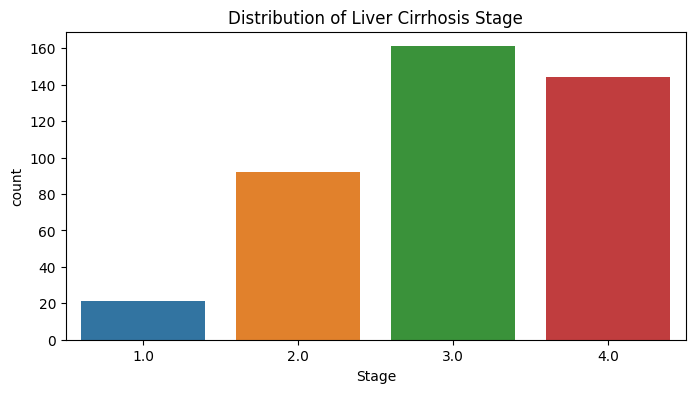

In [21]:
# Univariate visuals for target and features
plt.figure(figsize=(8, 4))
sns.countplot(x="Stage", data=df_cleaned)
plt.title("Distribution of Liver Cirrhosis Stage")
plt.show()

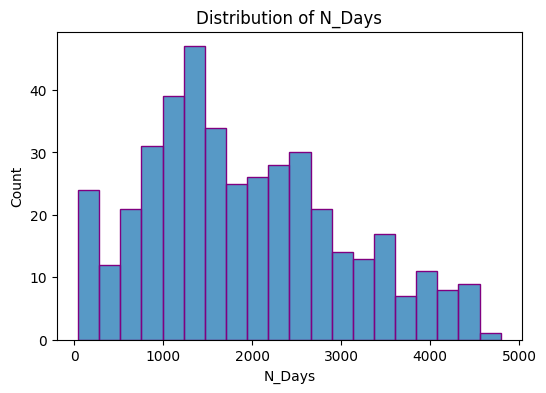

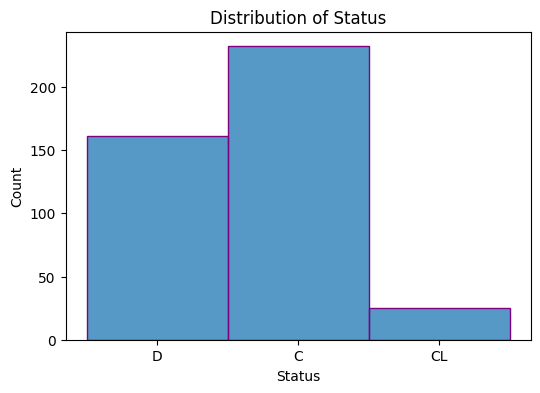

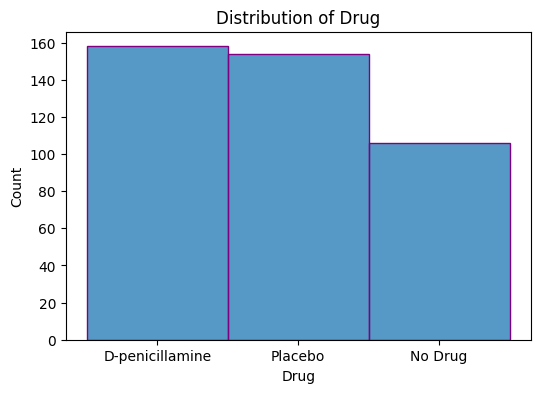

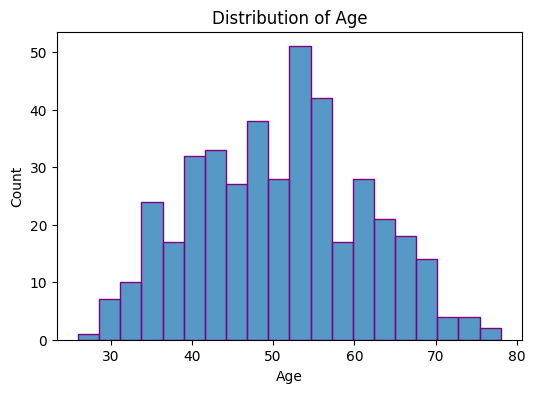

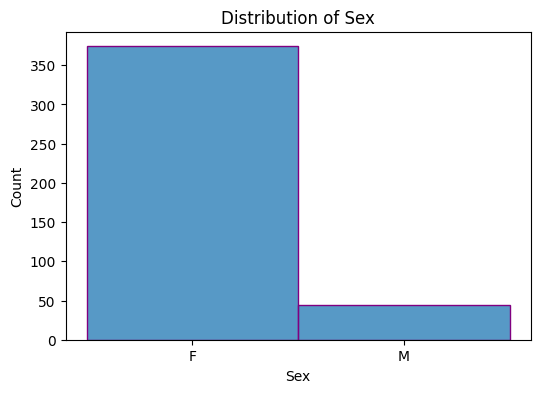

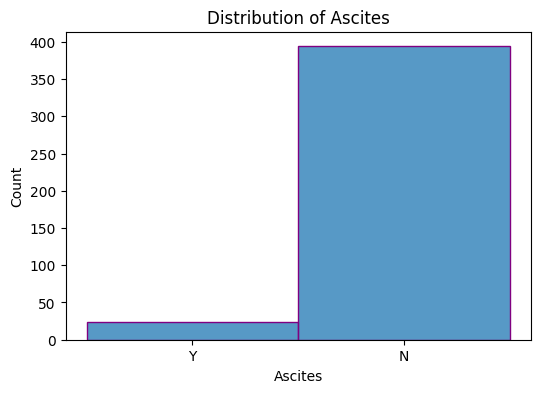

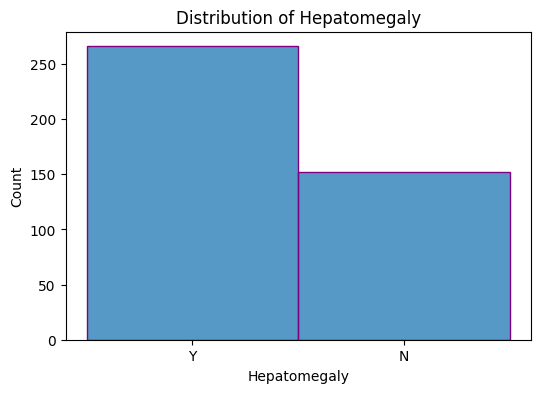

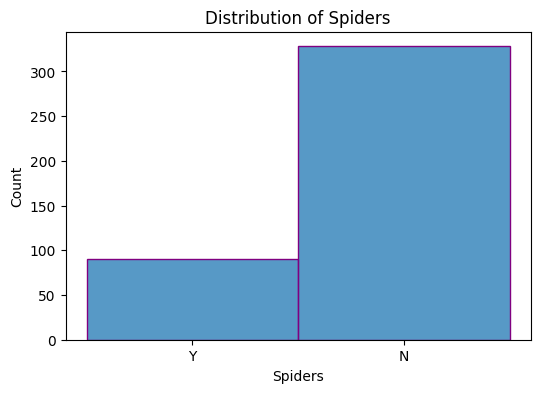

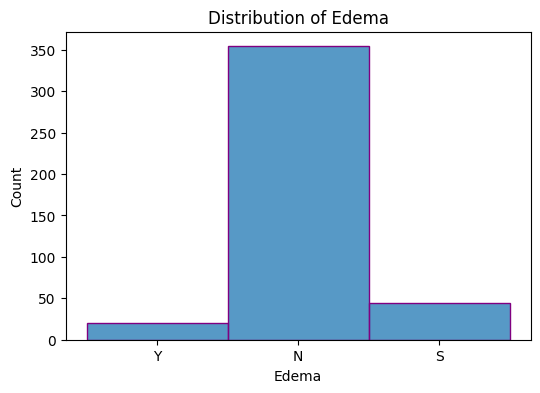

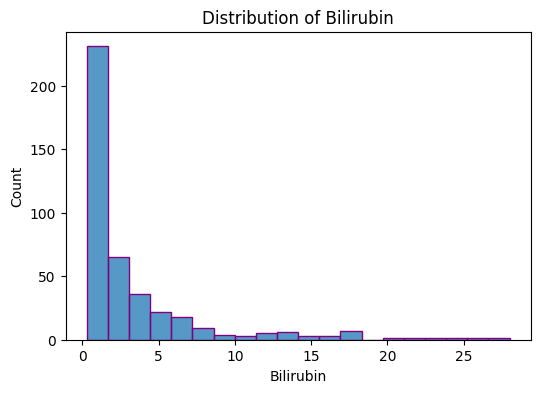

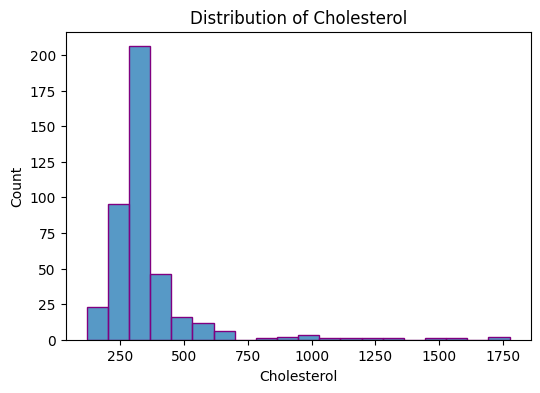

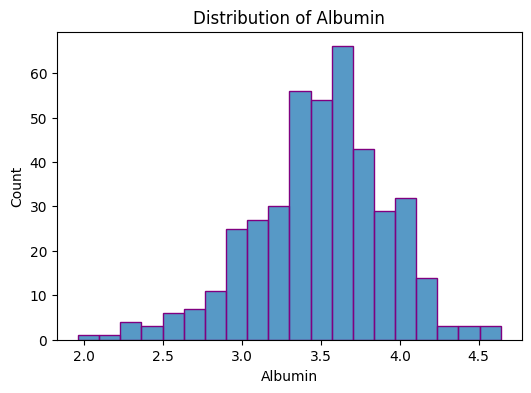

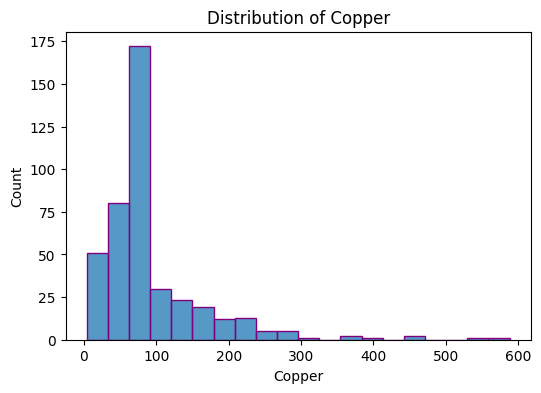

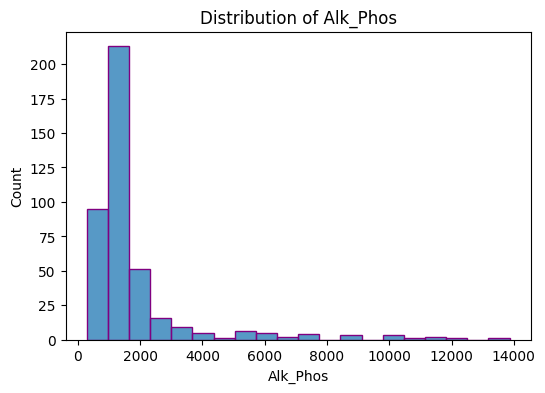

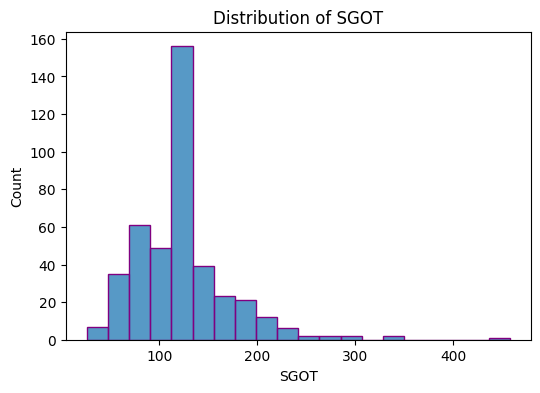

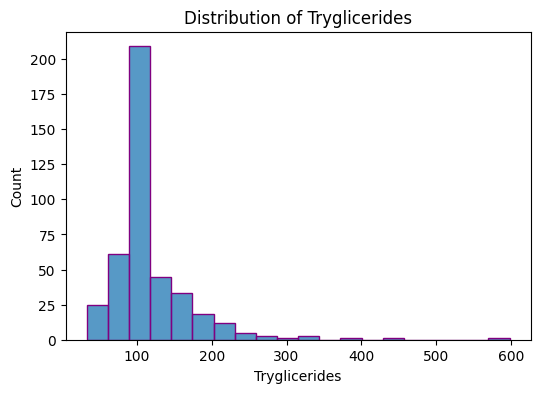

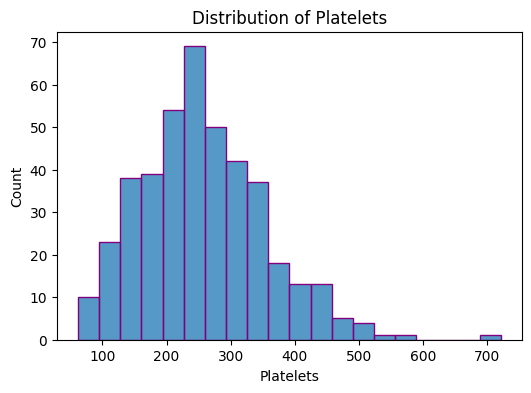

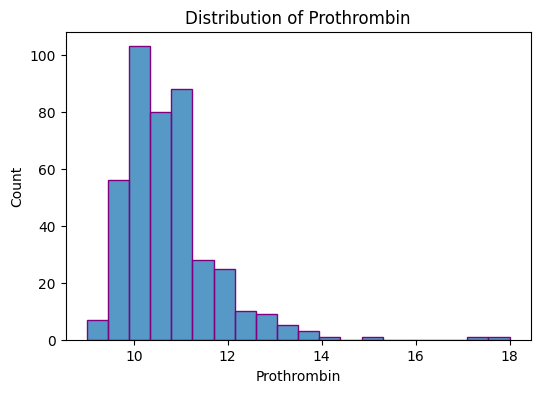

In [22]:
for col in df_cleaned.columns:
    if col != "Stage":
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df_cleaned, x=col, edgecolor="purple", bins=20)
        plt.title(f"Distribution of {col}")
        plt.show()

### Correlation Heatmap

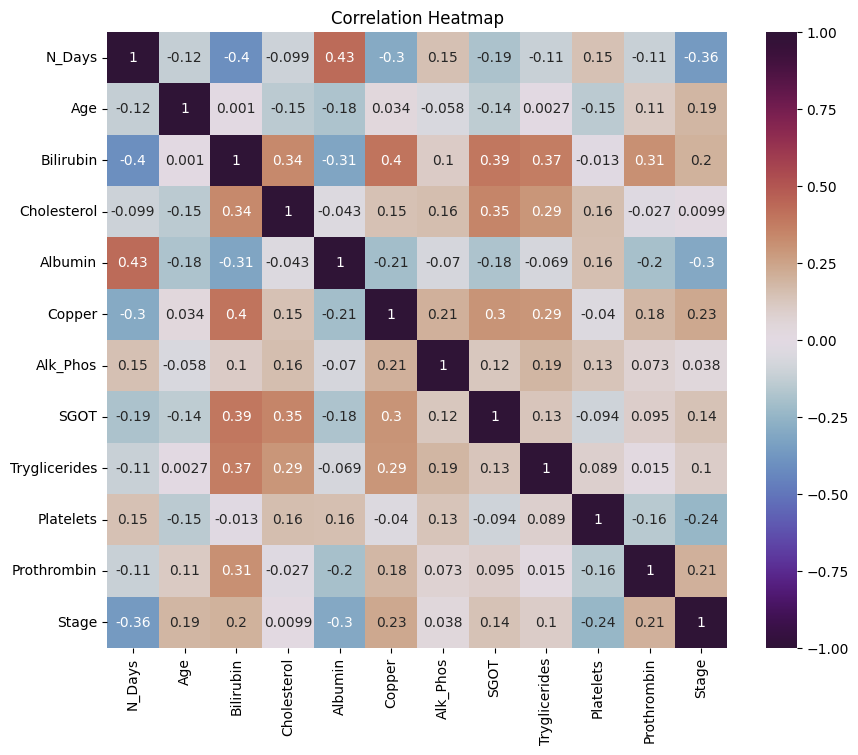

In [23]:
# Calculate and create a Correlation Heatmap
correlation_matrix = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="twilight_shifted", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

#### Analysis

- A moderate positive relationship (correlation of 0.43) exists between Albumin and N_Days. As Albumin increases, N_Days tends to increase.

- A moderate positive relationship (correlation of 0.4) is observed between Copper and Bilirubin. Higher Copper levels are associated with higher Bilirubin levels.

- A moderate positive relationship (correlation of 0.39) exists between SGOT and Bilirubin. Elevated SGOT levels tend to coincide with higher Bilirubin levels.

- A moderate positive relationship (correlation of 0.37) is observed between Triglycerides and Bilirubin. As Triglyceride levels rise, Bilirubin levels tend to increase.

- A moderate positive relationship (correlation of 0.35) is observed between SGOT and Cholesterol. Higher SGOT levels might be related to higher Cholesterol levels.

- A moderate positive relationship (correlation of 0.34) exists between Cholesterol and Bilirubin. As Cholesterol levels increase, Bilirubin levels also tend to increase.

- A moderate positive relationship (correlation of 0.31) exists between Prothrombin and Bilirubin. Higher Prothrombin levels might be associated with higher Bilirubin levels.

- A moderate positive relationship (correlation of 0.3) is observed between SGOT and Copper. Elevated SGOT levels might coincide with higher Copper levels.

### Multivariate Vizualization

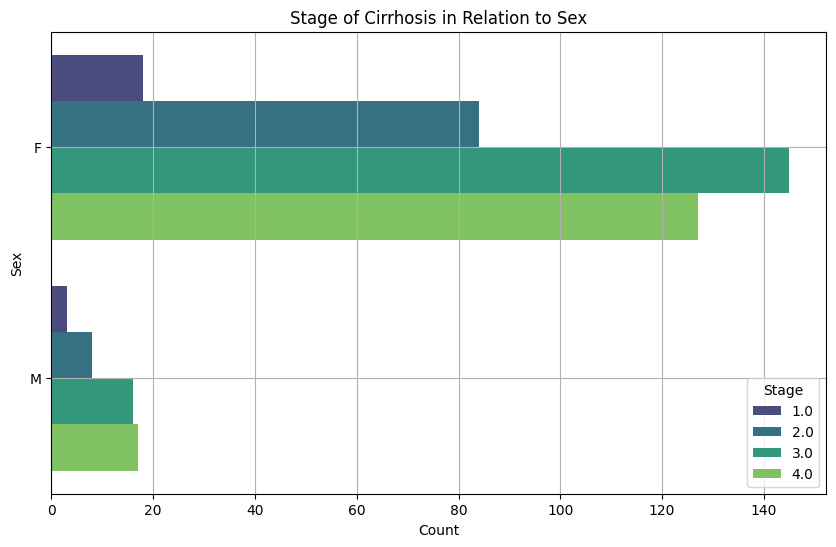

In [24]:
# Create a countplot to show the number of cirrhosis
# cases in the dataset sorted by stage and sex
plt.figure(figsize=(10, 6))
sns.countplot(y='Sex', hue='Stage', data=df_cleaned, palette="viridis")
plt.title('Stage of Cirrhosis in Relation to Sex')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.legend(title='Stage')
plt.grid(True)
plt.show()

#### Analysis

Consider our bodies to be automobiles, and the liver to be the mechanic who keeps everything operating properly. Cirrhosis of the liver occurs when the engine (liver) becomes damaged and no longer functions properly. When it comes to men and women, their bodies function differently. Women may be more prone than men to develop liver cirrhosis because their bodies handle things more delicately.

For example, when both men and women consume alcohol, women's body may have a more difficult time handling it. It's as though their mechanic (the liver) is having difficulty coping with it. This can lead to additional damage over time, and if the liver is severely injured, it can lead to cirrhosis.

Furthermore, hormones are specific molecules found in women's bodies that might impact how the liver operates. These hormones might sometimes render the liver more prone to injury.

Remember that not all women get liver cirrhosis, and it's not just about being a woman; other factors such as alcohol consumption and overall health also play a role. Just as some automobiles can continue for a long time without difficulties despite being driven frequently, others may develop problems sooner.

In simple terms, women may be more likely to develop liver cirrhosis because their bodies process things differently, similar to having a sensitive engine that requires extra care.

In [25]:
# Create a dictionary to map status labels
status_labels = {'D': 'Death', 'C': 'Censored', 'CL': 'Censored Due to Liver TX'}

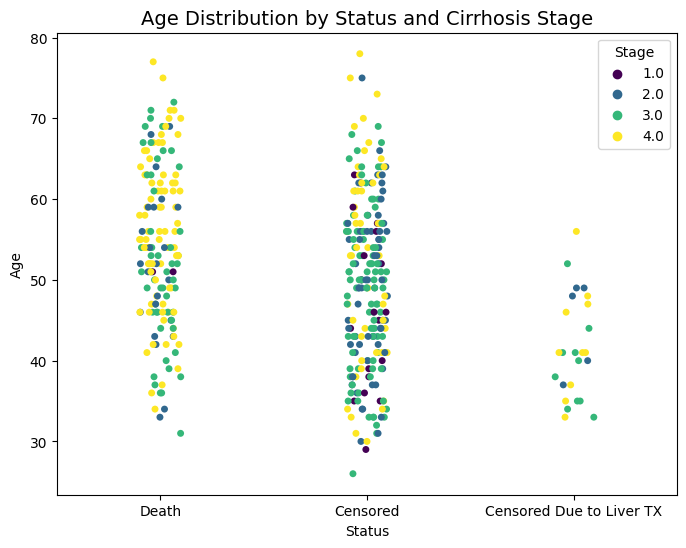

In [26]:
# Create a stripplot to show the age distribution by status and cirrhosis stage
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cleaned, x='Status', y='Age', hue='Stage', palette='viridis')

# Update X-axis labels using the status_labels dictionary
x_labels = [status_labels[status] for status in df_cleaned['Status'].unique()]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels)

plt.title('Age Distribution by Status and Cirrhosis Stage', fontsize=14)
plt.xlabel('Status')
plt.ylabel('Age')
plt.legend(title='Stage')
plt.show()

#### Analysis

In this visual, we have three different groups of people, and each group is going through a different situation:

1. Some people are doing really well, just like the superheroes in a cool story (we can call them the 'C' group).
2. A few people got better after they had a special treatment for their liver, kind of like a liver superhero power-up (let's call them the 'CL' group).
3. Unfortunately however, some people (we'll call them the 'D' group) are like characters who have reached the end of their story.

What's really interesting is that we see more dots, like little pictures of people, in the 'D' group for stages 3 and 4 of liver cirrhosis. This tells us that more people in the advanced stages of liver cirrhosis did not make it.

The 'CL' group on the other hand does not have many dots. That shows us that not many people from all four stages of liver cirrhosis got better, even after receiveing the special treatment.

In the 'C' group however, we see the superheroes who are still in the story. There are lots of dots for stages 1, 2, and 3 within this group signifying that most people in those stages are still doing okay and are fighting their battle, just like our brave heroes are.

## Modeling

In [27]:
# Define an X feature and y target using original uncleaned dataset
# minus 'ID' column as this column has a high cardinality
X = df_updated.drop(columns=['Stage'], axis=1)
y = df_updated['Stage']

### Split Data

In [28]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
# Apply preprocessing techniques and pipelines
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

median_imputer = SimpleImputer(strategy='median')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')

num_pipe = make_pipeline(median_imputer, scaler)
cat_pipe = make_pipeline(missing_imputer, ohe)

preprocessor = make_column_transformer((num_pipe, num_cols), (cat_pipe, cat_cols))
print(preprocessor.fit_transform(X_train, y_train).shape)

(334, 28)


In [30]:
# Double check that there are no missing values
print("Number of missing values in y_train:", y_train.isna().sum())

Number of missing values in y_train: 0


### Model Fitting

In [31]:
scores = pd.DataFrame()

#### Logistic Regression

In [32]:
# Instantiate and fit a Logistic Regression model
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train)

logreg_train_pred = logreg_pipe.predict(X_train)
logreg_test_pred = logreg_pipe.predict(X_test)

Logistic Regression Train 

              precision    recall  f1-score   support

         1.0       0.40      0.11      0.17        18
         2.0       0.50      0.38      0.43        76
         3.0       0.53      0.62      0.57       127
         4.0       0.67      0.72      0.69       113

    accuracy                           0.57       334
   macro avg       0.52      0.46      0.47       334
weighted avg       0.56      0.57      0.56       334



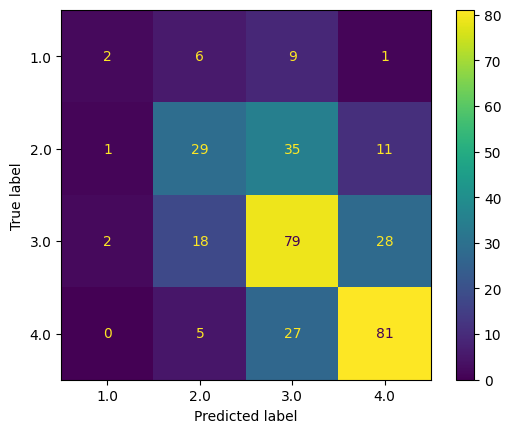

Logistic Regression Test 

              precision    recall  f1-score   support

         1.0       0.33      0.33      0.33         3
         2.0       0.19      0.19      0.19        16
         3.0       0.50      0.50      0.50        34
         4.0       0.65      0.65      0.65        31

    accuracy                           0.49        84
   macro avg       0.42      0.42      0.42        84
weighted avg       0.49      0.49      0.49        84



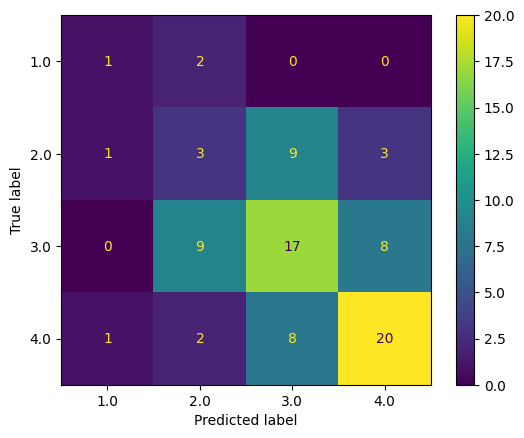

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression Train,0.562070,0.571856,0.558974,0.571856
0,Logistic Regression Test,0.488095,0.488095,0.488095,0.488095


In [33]:
# Evaluate Logistic Regression model
logreg_train_scores = eval_classification(
    y_train, logreg_train_pred, name='Logistic Regression Train')
logreg_test_scores = eval_classification(
    y_test, logreg_test_pred, name='Logistic Regression Test')

logreg_scores = pd.concat([logreg_train_scores, logreg_test_scores])
logreg_scores

#### Random Forest

In [34]:
# Instantiate and fit a Random Forest model
random_forest = RandomForestClassifier()
random_forest_pipe = make_pipeline(preprocessor, random_forest)
random_forest_pipe.fit(X_train, y_train)

random_forest_train_pred = random_forest_pipe.predict(X_train)
random_forest_test_pred = random_forest_pipe.predict(X_test)

Random Forest Train 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00       127
         4.0       1.00      1.00      1.00       113

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



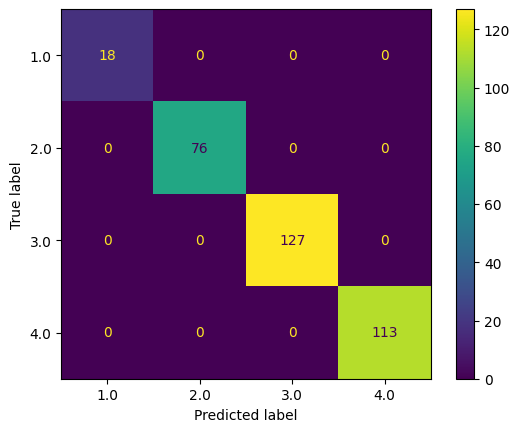

Random Forest Test 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.20      0.12      0.15        16
         3.0       0.45      0.59      0.51        34
         4.0       0.57      0.55      0.56        31

    accuracy                           0.46        84
   macro avg       0.31      0.32      0.31        84
weighted avg       0.43      0.46      0.44        84



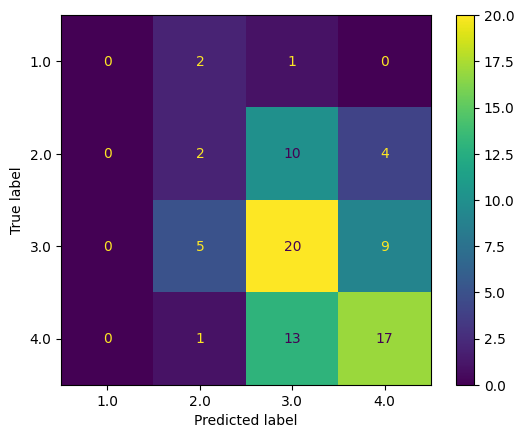

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Random Forest Train,1.000000,1.000000,1.000000,1.000000
0,Random Forest Test,0.431205,0.464286,0.442573,0.464286


In [35]:
# Evaluate Random Forest model
random_forest_train_scores = eval_classification(
    y_train, random_forest_train_pred, name='Random Forest Train')
random_forest_test_scores = eval_classification(
    y_test, random_forest_test_pred, name='Random Forest Test')

random_forest_scores = pd.concat([
    random_forest_train_scores, random_forest_test_scores])
random_forest_scores

#### Gradient Boost

In [36]:
# Instantiate and fit a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()
gradient_boosting_pipe = make_pipeline(preprocessor, gradient_boosting)
gradient_boosting_pipe.fit(X_train, y_train)

gradient_boosting_train_pred = gradient_boosting_pipe.predict(X_train)
gradient_boosting_test_pred = gradient_boosting_pipe.predict(X_test)

Gradient Boosting Train 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        18
         2.0       0.99      0.97      0.98        76
         3.0       0.98      1.00      0.99       127
         4.0       1.00      0.99      1.00       113

    accuracy                           0.99       334
   macro avg       0.99      0.99      0.99       334
weighted avg       0.99      0.99      0.99       334



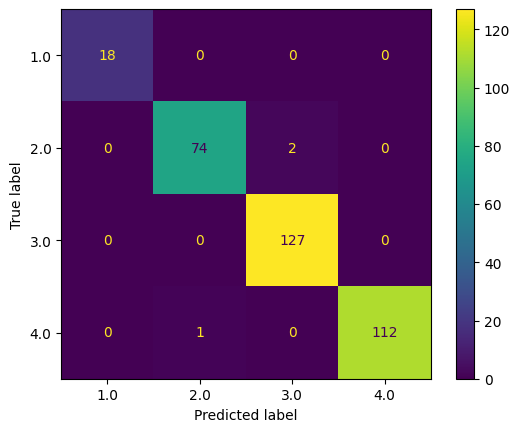

Gradient Boosting Test 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.17      0.12      0.14        16
         3.0       0.51      0.65      0.57        34
         4.0       0.72      0.68      0.70        31

    accuracy                           0.54        84
   macro avg       0.35      0.36      0.35        84
weighted avg       0.51      0.54      0.52        84



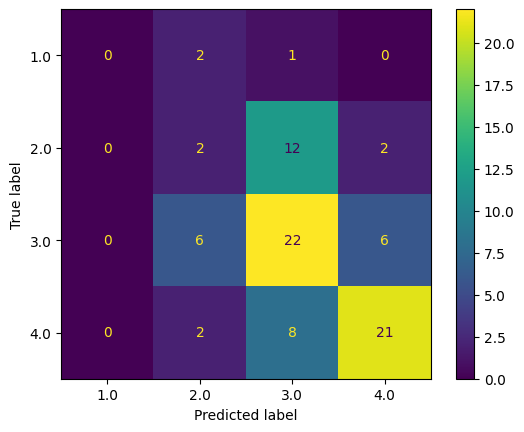

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Gradient Boosting Train,0.991071,0.991018,0.991005,0.991018
0,Gradient Boosting Test,0.506075,0.535714,0.516837,0.535714


In [37]:
# Evaluate Gradient Boosting model
gradient_boosting_train_scores = eval_classification(
    y_train, gradient_boosting_train_pred, name='Gradient Boosting Train')
gradient_boosting_test_scores = eval_classification(
    y_test, gradient_boosting_test_pred, name='Gradient Boosting Test')

gradient_boosting_scores = pd.concat([
    gradient_boosting_train_scores, gradient_boosting_test_scores])
gradient_boosting_scores

#### GridSearchCV

In [38]:
# Set hyperparameters for tuning
param_grid_logreg = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

param_grid_random_forest = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30]}

param_grid_gradient_boosting = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1],
    'gradientboostingclassifier__max_depth': [3, 4, 5]}


In [39]:
# GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(
    logreg_pipe, param_grid_logreg, scoring='f1_weighted', cv=5)
grid_search_logreg.fit(X_train, y_train)
best_logreg = grid_search_logreg.best_estimator_
best_logreg_train_pred = best_logreg.predict(X_train)
best_logreg_test_pred = best_logreg.predict(X_test)

In [40]:
# GridSearchCV for Random Forest
grid_search_random_forest = GridSearchCV(
    random_forest_pipe, param_grid_random_forest, scoring='f1_weighted', cv=5)
grid_search_random_forest.fit(X_train, y_train)
best_random_forest = grid_search_random_forest.best_estimator_
best_random_forest_train_pred = best_random_forest.predict(X_train)
best_random_forest_test_pred = best_random_forest.predict(X_test)

In [41]:
# GridSearchCV for Gradient Boosting
grid_search_gradient_boosting = GridSearchCV(
    gradient_boosting_pipe, param_grid_gradient_boosting, scoring='f1_weighted', cv=5)
grid_search_gradient_boosting.fit(X_train, y_train)
best_gradient_boosting = grid_search_gradient_boosting.best_estimator_
best_gradient_boosting_train_pred = best_gradient_boosting.predict(X_train)
best_gradient_boosting_test_pred = best_gradient_boosting.predict(X_test)

#### Best-Tuned Models

Best Logistic Regression Train 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        18
         2.0       0.48      0.29      0.36        76
         3.0       0.52      0.68      0.59       127
         4.0       0.65      0.72      0.68       113

    accuracy                           0.57       334
   macro avg       0.41      0.42      0.41       334
weighted avg       0.53      0.57      0.54       334



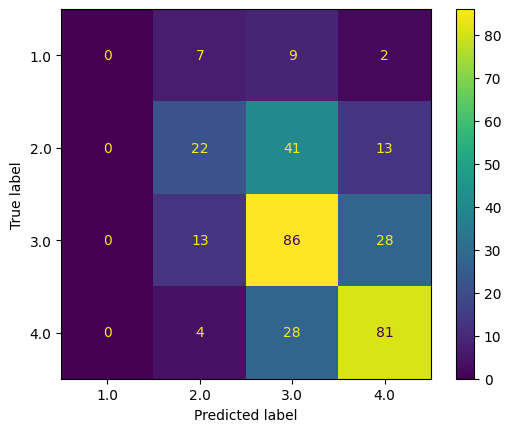

Best Logistic Regression Test 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.27      0.19      0.22        16
         3.0       0.51      0.62      0.56        34
         4.0       0.62      0.65      0.63        31

    accuracy                           0.52        84
   macro avg       0.35      0.36      0.35        84
weighted avg       0.49      0.52      0.50        84



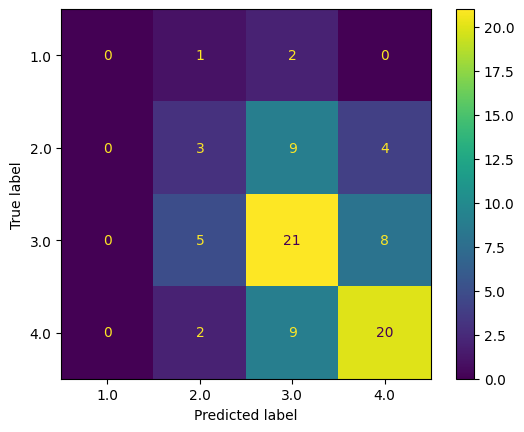

Best Random Forest Train 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00       127
         4.0       1.00      1.00      1.00       113

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



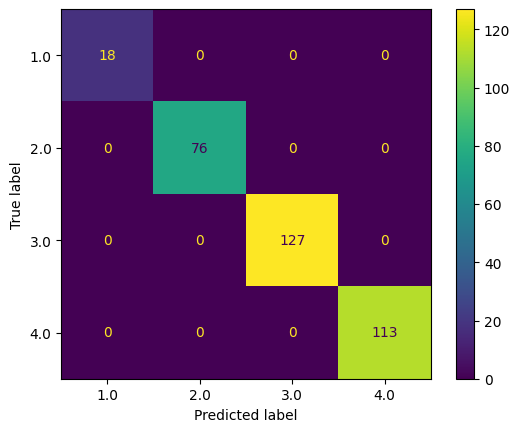

Best Random Forest Test 

              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.20      0.12      0.15        16
         3.0       0.48      0.62      0.54        34
         4.0       0.59      0.55      0.57        31

    accuracy                           0.49        84
   macro avg       0.57      0.41      0.44        84
weighted avg       0.48      0.49      0.47        84



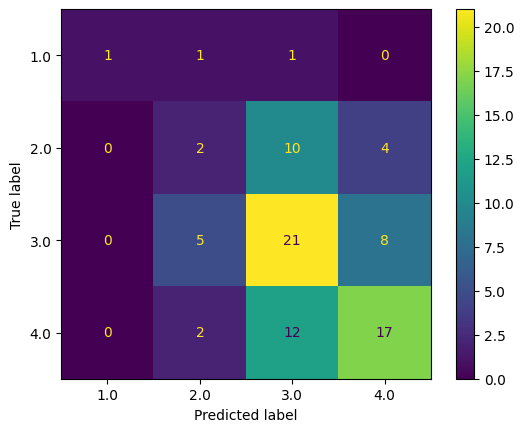

Best Gradient Boosting Train 

              precision    recall  f1-score   support

         1.0       1.00      0.61      0.76        18
         2.0       0.96      0.67      0.79        76
         3.0       0.78      0.97      0.87       127
         4.0       0.89      0.89      0.89       113

    accuracy                           0.86       334
   macro avg       0.91      0.79      0.83       334
weighted avg       0.87      0.86      0.85       334



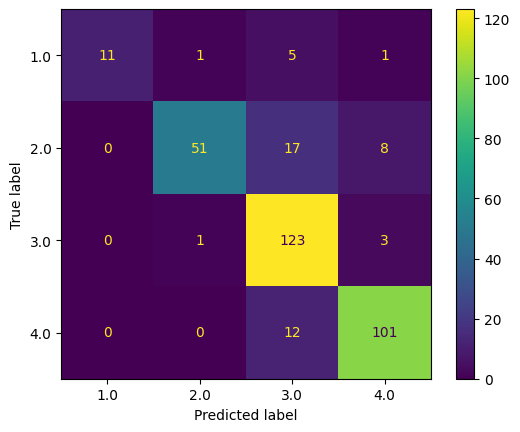

Best Gradient Boosting Test 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.31      0.25      0.28        16
         3.0       0.46      0.62      0.52        34
         4.0       0.68      0.55      0.61        31

    accuracy                           0.50        84
   macro avg       0.36      0.35      0.35        84
weighted avg       0.49      0.50      0.49        84



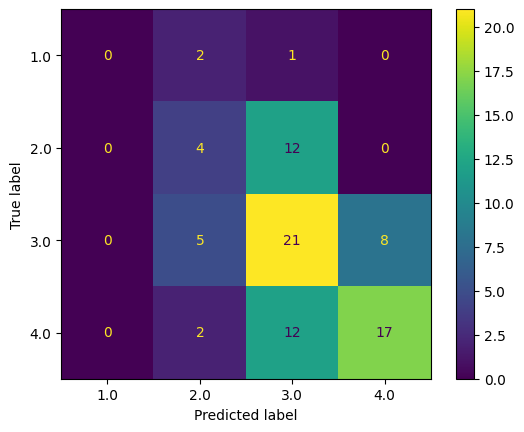

In [42]:
# Evaluate best-tuned models
best_logreg_train_scores = eval_classification(
    y_train, best_logreg_train_pred, name='Best Logistic Regression Train')
best_logreg_test_scores = eval_classification(
    y_test, best_logreg_test_pred, name='Best Logistic Regression Test')

best_random_forest_train_scores = eval_classification(
    y_train, best_random_forest_train_pred, name='Best Random Forest Train')
best_random_forest_test_scores = eval_classification(
    y_test, best_random_forest_test_pred, name='Best Random Forest Test')

best_gradient_boosting_train_scores = eval_classification(
    y_train, best_gradient_boosting_train_pred, name='Best Gradient Boosting Train')
best_gradient_boosting_test_scores = eval_classification(
    y_test, best_gradient_boosting_test_pred, name='Best Gradient Boosting Test')

In [43]:
# Concatenate and display best-tuned model scores
best_scores = pd.concat([
    best_logreg_train_scores, best_logreg_test_scores,
    best_random_forest_train_scores, best_random_forest_test_scores,
    best_gradient_boosting_train_scores, best_gradient_boosting_test_scores
    ], ignore_index=True)

best_scores

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Best Logistic Regression Train,0.529221,0.565868,0.538071,0.565868
1,Best Logistic Regression Test,0.489920,0.523810,0.503311,0.523810
2,Best Random Forest Train,1.000000,1.000000,1.000000,1.000000
3,Best Random Forest Test,0.483330,0.488095,0.474237,0.488095
4,Best Gradient Boosting Train,0.873140,0.856287,0.852561,0.856287
5,Best Gradient Boosting Test,0.494343,0.500000,0.489110,0.500000


###Feature Engineering: PCA

In [44]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
# Create pipelines and column transformers
num_preprocessor = make_pipeline(
    median_imputer, scaler, pca)
preprocessor = make_column_transformer(
    (num_preprocessor, num_cols),
    (cat_pipe, cat_cols))
# Fit preprocessing on X_train
preprocessor.fit(X_train)
# Fit PCA to X_train and X_test
X_train_pca = preprocessor.fit_transform(X_train)
X_test_pca = preprocessor.fit_transform(X_test)

In [45]:
# Check the shape of X_train_pca and X_test_pca
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (334, 27)
Shape of X_test_pca: (84, 26)


#### Logistic Regression with PCA

In [46]:
# Instantiate and fit a Logistic Regression model with feature-engineered data
logistic_regression_fe = LogisticRegression()
preprocessor_fe = make_column_transformer((num_preprocessor, num_cols),
                           (cat_pipe, cat_cols))
lr_pipe_fe = make_pipeline(preprocessor_fe, logistic_regression_fe)
lr_pipe_fe.fit(X_train, y_train)
# Predict on the training and test sets
lr_fe_train_pred = lr_pipe_fe.predict(X_train)
lr_fe_test_pred = lr_pipe_fe.predict(X_test)

Logistic Regression FE Train 

              precision    recall  f1-score   support

         1.0       0.40      0.11      0.17        18
         2.0       0.47      0.34      0.40        76
         3.0       0.52      0.62      0.57       127
         4.0       0.67      0.73      0.69       113

    accuracy                           0.57       334
   macro avg       0.52      0.45      0.46       334
weighted avg       0.55      0.57      0.55       334



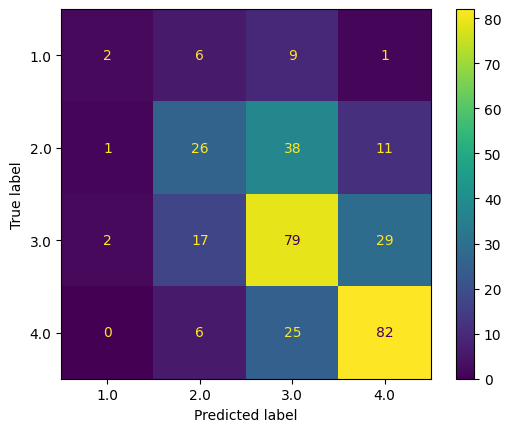

Logistic Regression FE Test 

              precision    recall  f1-score   support

         1.0       0.33      0.33      0.33         3
         2.0       0.20      0.19      0.19        16
         3.0       0.51      0.53      0.52        34
         4.0       0.65      0.65      0.65        31

    accuracy                           0.50        84
   macro avg       0.42      0.42      0.42        84
weighted avg       0.50      0.50      0.50        84



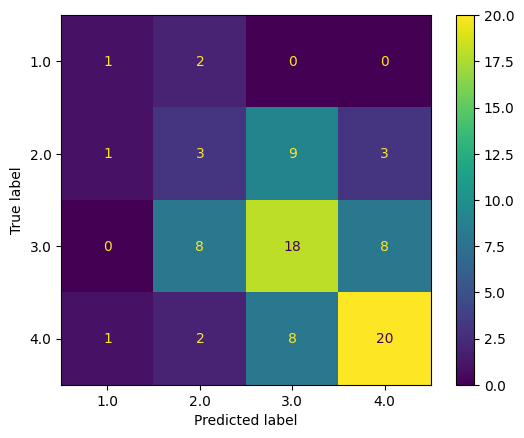

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression FE Train,0.553606,0.565868,0.550909,0.565868
0,Logistic Regression FE Test,0.496259,0.500000,0.498046,0.500000


In [47]:
# Evaluate Logistic Regression model with feature-engineered data
lr_fe_train_scores = eval_classification(
    y_train, lr_fe_train_pred, name='Logistic Regression FE Train')
lr_fe_test_scores = eval_classification(
    y_test, lr_fe_test_pred, name='Logistic Regression FE Test')

lr_fe_scores = pd.concat([lr_fe_train_scores, lr_fe_test_scores])

# Print scores for the feature-engineered Logistic Regression model
lr_fe_scores

#### Random Forest with PCA

In [48]:
# Instantiate and fit a Random Forest model with feature-engineered data
random_forest_fe = RandomForestClassifier()
rf_pipe_fe = make_pipeline(make_column_transformer(
    (num_preprocessor, num_cols),
    (cat_pipe, cat_cols)), random_forest_fe)
rf_pipe_fe.fit(X_train, y_train)
# Predict on the training and test sets
rf_fe_train_pred = rf_pipe_fe.predict(X_train)
rf_fe_test_pred = rf_pipe_fe.predict(X_test)

Random Forest FE Train 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00       127
         4.0       1.00      1.00      1.00       113

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



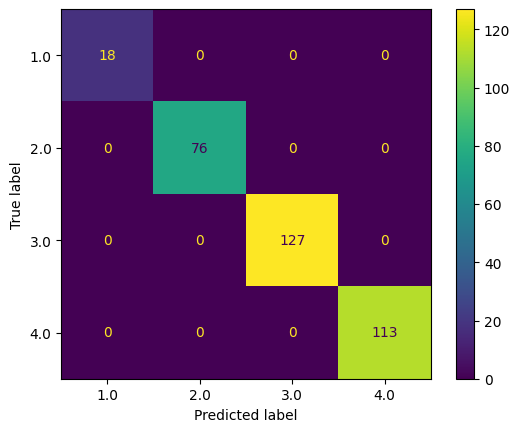

Random Forest FE Test 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.29      0.25      0.27        16
         3.0       0.49      0.62      0.55        34
         4.0       0.67      0.58      0.62        31

    accuracy                           0.51        84
   macro avg       0.36      0.36      0.36        84
weighted avg       0.50      0.51      0.50        84



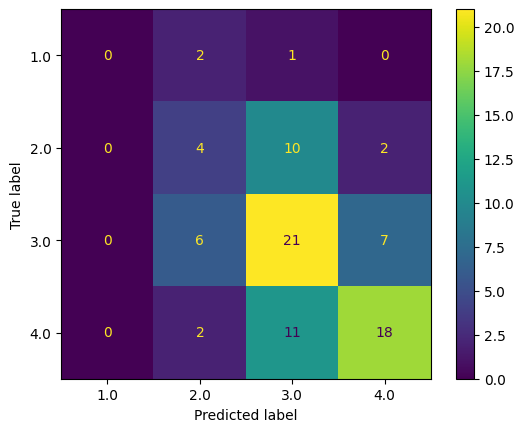

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Random Forest FE Train,1.000000,1.000000,1.000000,1.000000
0,Random Forest FE Test,0.498128,0.511905,0.500637,0.511905


In [49]:
# Evaluate Random Forest model with feature-engineered data
rf_fe_train_scores = eval_classification(
    y_train, rf_fe_train_pred, name='Random Forest FE Train')
rf_fe_test_scores = eval_classification(
    y_test, rf_fe_test_pred, name='Random Forest FE Test')

rf_fe_scores = pd.concat([rf_fe_train_scores, rf_fe_test_scores])

# Print scores for the feature-engineered Random Forest model
rf_fe_scores

#### Gradient Boost with PCA

In [50]:
# Instantiate and fit a Gradient Boosting model with feature-engineered data
gradient_boosting_fe = GradientBoostingClassifier()
gb_pipe_fe = make_pipeline(make_column_transformer(
    (num_preprocessor, num_cols),
    (cat_pipe, cat_cols)
    ), gradient_boosting_fe)
gb_pipe_fe.fit(X_train, y_train)
# Predict on the training and test sets
gb_fe_train_pred = gb_pipe_fe.predict(X_train)
gb_fe_test_pred = gb_pipe_fe.predict(X_test)

Gradient Boosting FE Train 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00       127
         4.0       1.00      1.00      1.00       113

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



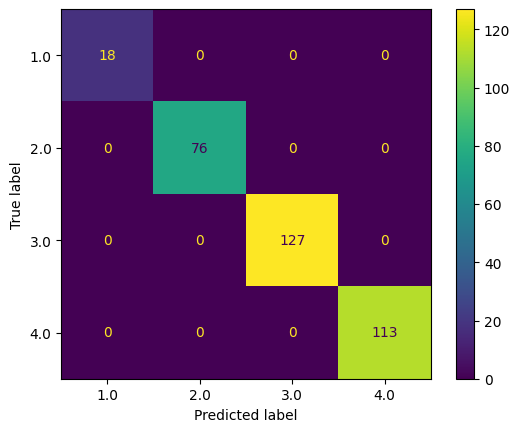

Gradient Boosting FE Test 

              precision    recall  f1-score   support

         1.0       0.50      0.33      0.40         3
         2.0       0.37      0.44      0.40        16
         3.0       0.47      0.50      0.49        34
         4.0       0.56      0.48      0.52        31

    accuracy                           0.48        84
   macro avg       0.47      0.44      0.45        84
weighted avg       0.48      0.48      0.48        84



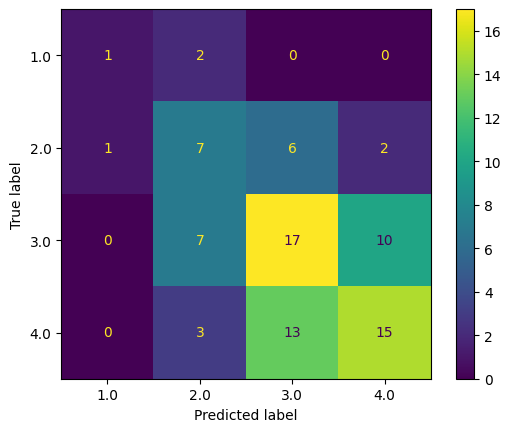

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Gradient Boosting FE Train,1.000000,1.00000,1.000000,1.00000
0,Gradient Boosting FE Test,0.484197,0.47619,0.477962,0.47619


In [51]:
# Evaluate Gradient Boosting model with feature-engineered data
gb_fe_train_scores = eval_classification(
    y_train, gb_fe_train_pred, name='Gradient Boosting FE Train')
gb_fe_test_scores = eval_classification(
    y_test, gb_fe_test_pred, name='Gradient Boosting FE Test')

gb_fe_scores = pd.concat([gb_fe_train_scores, gb_fe_test_scores])

# Print scores for the feature-engineered Gradient Boosting model
gb_fe_scores

#### Combined Scores

In [52]:
# Create a DataFrame to organize the scores
model_scores = pd.concat([lr_fe_scores, rf_fe_scores, gb_fe_scores], ignore_index=True)
model_scores

,Model Name,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression FE Train,0.553606,0.565868,0.550909,0.565868
1,Logistic Regression FE Test,0.496259,0.500000,0.498046,0.500000
2,Random Forest FE Train,1.000000,1.000000,1.000000,1.000000
3,Random Forest FE Test,0.498128,0.511905,0.500637,0.511905
4,Gradient Boosting FE Train,1.000000,1.000000,1.000000,1.000000
5,Gradient Boosting FE Test,0.484197,0.476190,0.477962,0.476190


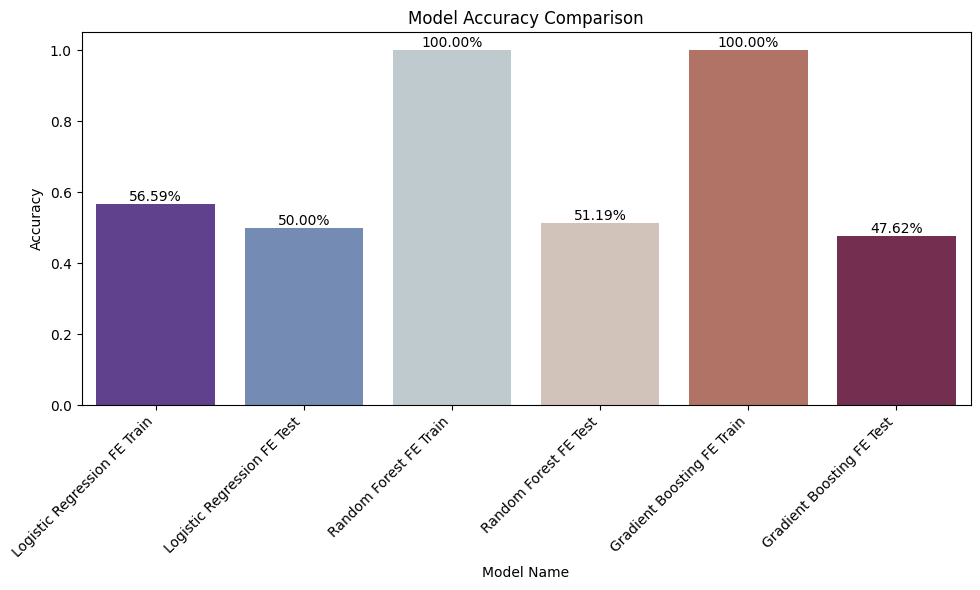

In [53]:
# Create a bar chart to visualize the scores
plt.figure(figsize=(10, 6))
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
ax = sns.barplot(data=model_scores, x='Model Name', y='Accuracy', palette='twilight_shifted')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations on top of each bar
for p in ax.patches:
    percentage = f'{p.get_height():.2%}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Analysis

Consider these models to be weather forecasters who are trying to predict rain. We are scouting for the best forecaster. What really matters are two things: how good they are at correctly predicting when it will rain (like a forecaster who is exceptional at detecting rainy days) and how often they predict rain when it is actually a sunny day (like a forecaster who does not incorrectly state it's going to rain when it is not).

Let's take a look at their performance:

- Forecaster A (Logistic Regression): When it comes to predicting rainy days, this forecaster is decent. They get it right about 57% of the time. However, they sometimes predict rain even on sunny days, about 50% of the time.

- Forecaster B (Random Forest): This forecaster is almost flawless at predicting rainy days! However, about 51% of the time, they go overboard and predict rain even when it is sunny.

- Forecaster C (Gradient Boosting): Like the Random Forest forecaster, this one is great at predicting rainy days. They get it right 100% of the time. They can, however, be a little unreliable, predicting rain even on sunny days around 48% of the time.

We noticed something interesting when the forecasters were evaluated on data they had never seen before:

- Forecaster A (Logistic Regression): Their accuracy was relatively consistent in both experimental and real-world circumstances. They were consistent and did not vary much when confronted with  new experimental data.

- Forecaster B (Random Forest): Their accuracy dropped a bit, and they were not nearly as accurate as before in predicting rainy days. They were still good, but not quite as good as they appeared in practice.

- Forecaster C (Gradient Boosting): Their accuracy declined quite a bit as well, and they made some errors in predicting rainy days. They were less precise when it mattered most.

Even after applying PCA feature engineering to the models, the analysis continues to highlight that Forecaster A (Logistic Regression) appears to be the best option. Their consistent performance in accurately predicting rainy days and minimizing false predictions on sunny days showcases their reliability across various scenarios. The application of PCA seems to have had a limited impact on their overall performance, reinforcing their suitability as the preferred forecaster in this context.

So, based on their performance with the new experimental data, **Forecaster A (Logistic Regression)** appears to be the best option. They are skilled at predicting rainy days and not incorrectly predicting rain on sunny days. They might not be perfect, but they seem to handle various scenarios and data well and are reliable in different situations.
